In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("zuu crew scores.csv")
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [3]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [4]:
X = np.column_stack([df['TotalHours'].values, df['Attendance'].values]).reshape(-1, 2)
Y = df['CapstoneScore'].values

In [5]:
def compute_cost(X, Y, beta):
    m = len(Y)
    y_hat = X.dot(beta)
    cost = (1/(2*m)) * np.sum((y_hat - Y) ** 2)

    return cost

In [6]:
X_with_bias = np.column_stack([np.ones((len(X))), X])
X_with_bias

array([[ 1. , 43.7, 79.9],
       [ 1. , 95.6, 76.8],
       [ 1. , 75.9, 96.6],
       [ 1. , 24. , 83.2],
       [ 1. , 88. , 86.5],
       [ 1. , 97.3, 76.6],
       [ 1. , 26.5, 83.8],
       [ 1. , 57.2, 90. ],
       [ 1. , 48.9, 68.4],
       [ 1. , 36.2, 95.9],
       [ 1. , 65.1, 68.2],
       [ 1. , 22.6, 67.6],
       [ 1. , 36.3, 61.5],
       [ 1. , 51. , 82.6],
       [ 1. , 56.3, 78.1],
       [ 1. , 15.9, 66.2],
       [ 1. , 96.9, 94.5],
       [ 1. , 18.8, 70.8],
       [ 1. , 54.6, 66.2],
       [ 1. , 91.8, 86.4],
       [ 1. , 69.6, 68.9],
       [ 1. , 38.1, 69.2],
       [ 1. , 26.6, 64.2],
       [ 1. , 97.3, 92. ],
       [ 1. , 94.6, 86.1],
       [ 1. , 27.6, 94.2],
       [ 1. , 39.3, 75.9],
       [ 1. , 34.4, 68.2],
       [ 1. , 42.1, 95.9],
       [ 1. , 35.3, 60.5],
       [ 1. , 98.8, 83.3],
       [ 1. , 27.9, 95.7],
       [ 1. , 10.5, 92.7],
       [ 1. , 73.6, 70.4],
       [ 1. , 75.6, 75.2],
       [ 1. , 79.4, 83.6],
       [ 1. , 16.7, 70.7],
 

In [7]:
beta = np.random.randn(3)
print(f"Initial beta parameters: {beta}")

Initial beta parameters: [0.73350005 0.59902054 0.04648212]


In [8]:
y_hat = X_with_bias.dot(beta)
y_hat

array([30.62461916, 61.56969058, 50.68933196, 18.97730553, 57.46801106,
       62.57872907, 20.50274616, 39.18086587, 33.20498156, 26.87567906,
       42.89981788, 17.41355568, 25.33659612, 35.12297083, 38.08861014,
       13.33504309, 63.17115084, 15.28602042, 36.51713797, 59.7396409 ,
       45.62794779, 26.77274543, 19.65159862, 63.29455375, 61.40295377,
       21.64508282, 27.8030003 , 24.50988732, 30.40990025, 24.69109346,
       63.7886901 , 21.89451216, 11.33210841, 48.09375313, 49.51490839,
       52.18163627, 14.02342907, 27.91193387, 14.68872225, 44.80281309,
       48.0115853 , 51.04289841, 40.77183204, 52.26065587, 36.58791056,
       37.92689799, 34.12742639, 12.7217756 , 44.34316479, 26.49745151,
       58.6710768 , 24.00442985, 32.127794  , 59.90630357, 45.28367777,
       57.58676576, 57.93935692, 40.26637458, 53.84232562, 53.75393546,
       10.32756987, 37.79269867, 32.57034944, 61.42462072, 27.82729077,
       38.71866818, 49.17371247, 30.46253057, 62.3266762 , 25.77

In [9]:
cost = compute_cost(X_with_bias, Y, beta)
print("Initial Cost:", cost)

Initial Cost: 158.16731319884354


In [10]:
def gradient_descent(X, Y, beta, lr, n_iter):
    m = len(Y)
    cost_history = []

    for i in range(n_iter):
        y_hat = X.dot(beta)

        gradients = (1 / m) * X.T.dot(y_hat - Y)

        beta = beta - lr * gradients

        cost = compute_cost(X, Y, beta)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"Iteration : {i}, Cost: {cost:.4f}")

    return beta, cost_history

In [11]:
lr = 0.00001
n_iter = 10000

beta, cost_history = gradient_descent(X_with_bias, Y, beta, lr, n_iter)

Iteration : 0, Cost: 131.8503
Iteration : 1000, Cost: 13.5521
Iteration : 2000, Cost: 13.5515
Iteration : 3000, Cost: 13.5509
Iteration : 4000, Cost: 13.5504
Iteration : 5000, Cost: 13.5498
Iteration : 6000, Cost: 13.5492
Iteration : 7000, Cost: 13.5487
Iteration : 8000, Cost: 13.5481
Iteration : 9000, Cost: 13.5475


In [12]:
print(f"best beta : {beta}")

best beta : [0.75943547 0.63173026 0.23662671]


In [13]:
print(f"final cost : {cost_history[-1]}")

final cost : 13.54698157492862


In [14]:
y_hat = X_with_bias.dot(beta)
y_hat

array([47.27252207, 79.32577963, 71.56590247, 35.60830415, 76.81990878,
       80.35239572, 37.32960582, 58.19081035, 47.83631222, 46.32057255,
       58.02301704, 31.03250507, 38.24378665, 52.52304508, 54.80639523,
       26.46863495, 84.33532178, 29.38913558, 50.91659592, 79.19682109,
       61.0314419 , 41.20292681, 32.75489528, 83.9964471 , 80.8946778 ,
       40.48542692, 43.54640209, 38.62889814, 50.04778107, 37.37542968,
       82.88539008, 41.02988607, 29.32789945, 63.913303  , 66.31257174,
       70.7008111 , 28.03883936, 42.8920977 , 33.84335569, 62.14987849,
       62.04438738, 67.07976928, 58.31151848, 71.10307651, 51.76041939,
       52.29077251, 53.49928793, 32.05041289, 60.05171574, 39.3179458 ,
       73.9988484 , 40.89117564, 47.18808115, 75.45161028, 65.56490044,
       76.45737143, 73.65866748, 60.57379599, 71.17645931, 68.55055592,
       23.97232075, 54.02530938, 47.74860569, 80.27966605, 44.15359885,
       57.04675173, 70.13636784, 48.86508292, 78.58572807, 42.15

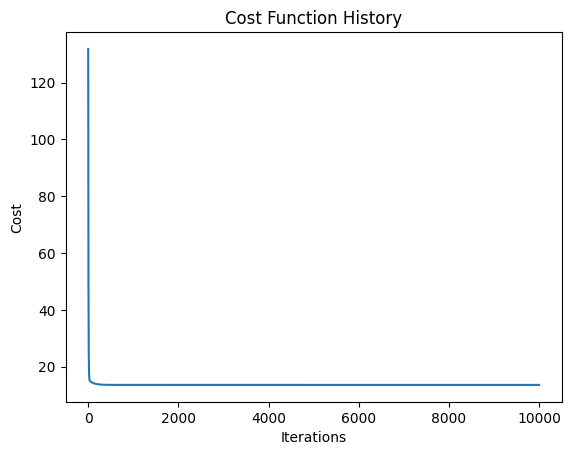

In [15]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [16]:
x_min, x_max = float(np.min(X)), float(np.max(X)) # get min and max values of X for plotting
x_interval = np.linspace(x_min, x_max, 100) # create an interval of X values for plotting the regression line
x_interval_with_bias = np.column_stack([np.ones((len(x_interval))), x_interval]) # add bias term to the interval X values
y_hat_interval = x_interval_with_bias.dot(beta) # calculate predicted Y values for the interval X values
y_hat_interval

ValueError: shapes (100,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

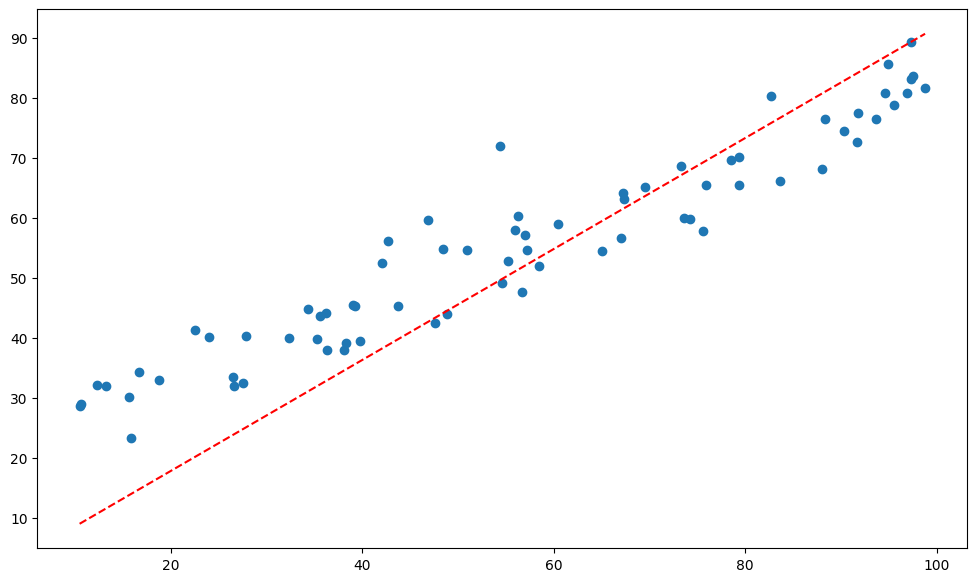

In [ ]:
plt.figure(figsize=(12, 7))

plt.scatter(X, Y)
plt.plot(x_interval, y_hat_interval, 'r--', label="fitted line")
plt.show()